<a href="https://colab.research.google.com/github/Sujitharasamsetty/Exploratory-Data-Analysis-On-Global-Terrorism-/blob/main/Exploratory_Data_Analysis_On_Global_Terrorism.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import MarkerCluster

%matplotlib inline

In [2]:
data=pd.read_csv("globalterrorism.csv",encoding ='latin =1')
data

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (4,31,33,76,94,96) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0.0,1.0,1.0,1.0,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5091,197707290007,1977,7,29,NaN,0,NaN,209,Turkey,10,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,0.0,-9.0,NaN
5092,197707290008,1977,7,29,NaN,0,NaN,209,Turkey,10,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,0.0,-9.0,NaN
5093,197707290009,1977,7,29,NaN,0,NaN,209,Turkey,10,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
5094,197707290010,1977,7,29,NaN,0,NaN,217,United States,1,...,Joseph Paul Franklin was convicted of this inc...,"Franklin Found Guilty After Admissions,"" Gadsd...","""Frankin Jury Hears His Taped Confession,"" Lod...","John Douglas and Mark Olshaker, ""The Anatomy o...",Hewitt Project,-9.0,-9.0,0.0,-9.0,NaN


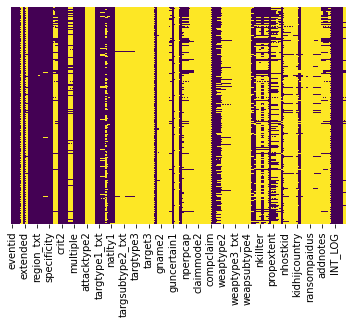

In [3]:
# Here We are cleaning the data and checking for any missing values(NAN) and their percentage of missing

sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5096 entries, 0 to 5095
Columns: 135 entries, eventid to related
dtypes: float64(64), int64(17), object(54)
memory usage: 5.2+ MB


In [5]:
# Information for the data

data.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,5.096000e+03,5096.000000,5096.000000,5096.000000,5096.000000,5096.000000,5096.000000,5006.000000,5006.000000,5096.000000,...,1.500000e+02,1.0,5.000000e+01,0.0,240.000000,177.000000,5095.000000,5095.000000,5095.000000,5095.000000
mean,1.973872e+11,1973.809066,6.158359,15.303375,0.030808,271.445840,5.754513,36.559454,-26.458558,1.098705,...,1.383369e+06,20000.0,1.966980e+06,NaN,2.816667,8.327684,-3.113052,-3.045535,0.494014,-1.288322
std,2.335571e+08,2.337862,3.293888,9.140459,0.172815,204.761573,3.378390,22.836022,51.475161,0.594603,...,5.623556e+06,NaN,6.206763e+06,NaN,1.296815,30.232902,4.426756,4.488904,0.717657,3.985630
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-43.532054,-157.818968,1.000000,...,0.000000e+00,20000.0,0.000000e+00,NaN,2.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.972051e+11,1972.000000,3.000000,7.000000,0.000000,98.000000,1.000000,35.800916,-73.931351,1.000000,...,0.000000e+00,20000.0,1.625000e+04,NaN,2.000000,1.000000,-9.000000,-9.000000,0.000000,0.000000
50%,1.974092e+11,1974.000000,6.000000,15.000000,0.000000,217.000000,8.000000,41.400635,-5.956210,1.000000,...,2.000000e+04,20000.0,1.000000e+05,NaN,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
75%,1.976052e+11,1976.000000,9.000000,23.000000,0.000000,362.000000,8.000000,52.501530,7.519113,1.000000,...,5.907500e+05,20000.0,1.112500e+06,NaN,4.000000,2.000000,0.000000,0.000000,1.000000,1.000000
max,1.977073e+11,1977.000000,12.000000,31.000000,1.000000,605.000000,12.000000,59.332788,172.636225,5.000000,...,6.100000e+07,20000.0,4.100000e+07,NaN,7.000000,187.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
# Corelation between different Entity

data.corr()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
eventid,1.000000,0.999901,-0.063184,-0.006704,-0.015385,-0.082134,0.342768,0.032176,0.314601,0.020734,...,0.080359,NaN,0.019454,NaN,0.124128,-0.162417,0.105198,0.099172,0.032696,0.168985
iyear,0.999901,1.000000,-0.077225,-0.007594,-0.015557,-0.082917,0.341791,0.032176,0.313578,0.020902,...,0.079144,NaN,0.014711,NaN,0.122895,-0.162613,0.103799,0.097833,0.031496,0.167055
imonth,-0.063184,-0.077225,1.000000,0.035738,0.012805,0.059647,0.044942,-0.002478,0.049960,-0.013995,...,0.078028,NaN,0.275073,NaN,0.074330,0.020178,0.091475,0.087668,0.081944,0.124854
iday,-0.006704,-0.007594,0.035738,1.000000,0.012098,0.032435,-0.005863,-0.016752,0.001796,0.004565,...,0.034757,NaN,0.029556,NaN,0.115033,-0.080317,0.023219,0.021814,0.030041,0.036527
extended,-0.015385,-0.015557,0.012805,0.012098,1.000000,-0.141626,-0.002844,-0.182776,0.010471,0.130845,...,-0.099314,NaN,-0.200685,NaN,-0.310948,-0.004413,0.079734,0.095684,0.040264,0.069612
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
nreleased,-0.162417,-0.162613,0.020178,-0.080317,-0.004413,0.110663,0.110715,0.236398,0.207601,-0.077107,...,0.020620,NaN,0.060030,NaN,-0.086934,1.000000,0.047209,0.049814,0.005725,-0.002547
INT_LOG,0.105198,0.103799,0.091475,0.023219,0.079734,0.175576,0.107333,0.028695,0.066309,0.069269,...,-0.066070,NaN,-0.082003,NaN,-0.010049,0.047209,1.000000,0.993899,0.137462,0.659634
INT_IDEO,0.099172,0.097833,0.087668,0.021814,0.095684,0.149118,0.108974,0.009348,0.069662,0.075667,...,-0.065535,NaN,-0.068990,NaN,-0.039555,0.049814,0.993899,1.000000,0.162192,0.663088
INT_MISC,0.032696,0.031496,0.081944,0.030041,0.040264,0.341633,0.321507,0.154368,0.284577,0.008055,...,-0.038265,NaN,0.010801,NaN,-0.043377,0.005725,0.137462,0.162192,1.000000,0.487954


In [7]:
data.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

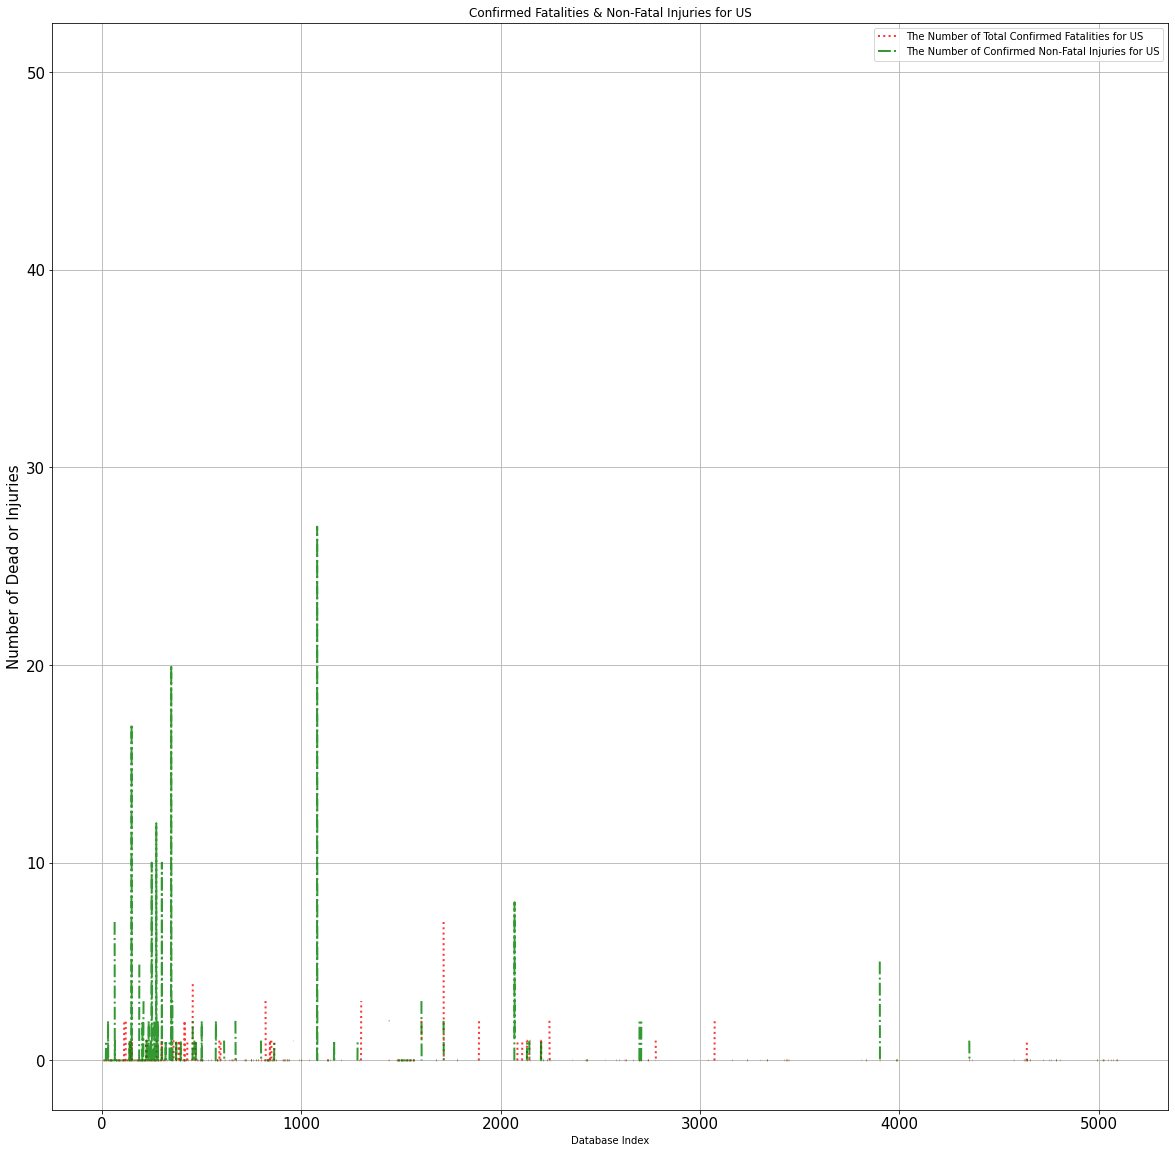

In [8]:
#US TERRORISM ATTACKS AND DEATH INJURIES

data.nkillus.plot(kind = 'line', color = 'red', label = 'The Number of Total Confirmed Fatalities for US', linewidth = 2, alpha = 0.8, grid = True, 
                 linestyle = ':', figsize = (20,20), fontsize=15)
data.nwoundus.plot(color = "green", label = 'The Number of Confirmed Non-Fatal Injuries for US', linewidth = 2, alpha = 0.8, grid = True, 
                 linestyle = '-.', figsize = (20,20), fontsize=15)

plt.legend(loc='upper right')     # legend = puts label into plot
plt.xlabel('Database Index', fontsize=10)              # label = name of label
plt.ylabel('Number of Dead or Injuries', fontsize=15)

plt.title('Confirmed Fatalities & Non-Fatal Injuries for US')            #plot title
plt.show()

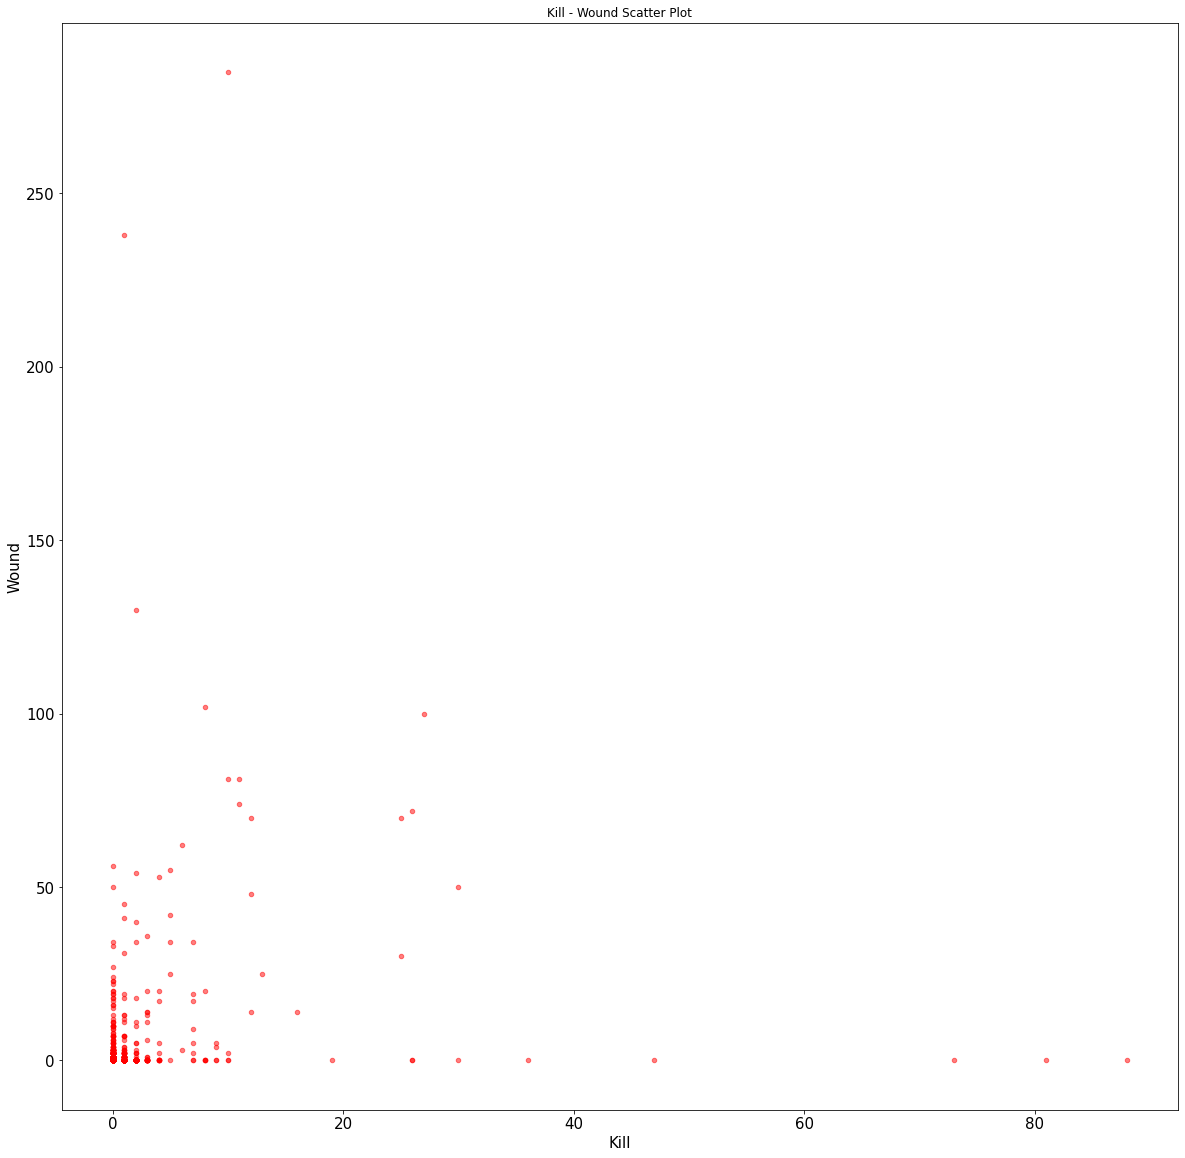

In [9]:
data.plot(kind = 'scatter', x = 'nkill', y = 'nwound', alpha = 0.5, color = 'red', figsize = (20,20), fontsize=15)
plt.xlabel('Kill', fontsize=15)
plt.ylabel('Wound', fontsize=15)
plt.title('Kill - Wound Scatter Plot')
plt.show()